# Chicago Real Estate Prediction
## Introduction
This notebook aims to predict real estate prices in Chicago using machine learning models. We will explore and preprocess the data, build predictive models, and evaluate their performance.
### Objectives:
1. Perform exploratory data analysis (EDA) to understand the dataset.
2. Preprocess the data for model training.
3. Train and evaluate multiple models:
   - Linear Regression
   - Random Forest Regressor
   - XGB Regressor
4. Identify the most important features affecting real estate prices.
## Data Loading

We start by loading the dataset and inspecting its structure to ensure it is ready for analysis. Key steps include:
- Loading the dataset into a Pandas DataFrame.
- Examining the first few rows, data types, and summary statistics.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-estate-data-chicago-2024/real_estate_data_chicago.csv


In [2]:
df= pd.read_csv("/kaggle/input/real-estate-data-chicago-2024/real_estate_data_chicago.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           2000 non-null   object 
 1   text           1992 non-null   object 
 2   year_built     1790 non-null   float64
 3   beds           1940 non-null   float64
 4   baths          1999 non-null   float64
 5   baths_full     1937 non-null   float64
 6   baths_half     592 non-null    float64
 7   garage         1282 non-null   float64
 8   lot_sqft       992 non-null    float64
 9   sqft           1447 non-null   float64
 10  stories        1620 non-null   float64
 11  lastSoldPrice  1415 non-null   float64
 12  soldOn         1415 non-null   object 
 13  listPrice      1994 non-null   float64
 14  status         2000 non-null   object 
dtypes: float64(11), object(4)
memory usage: 234.5+ KB


In [3]:
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,type,text,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,soldOn,listPrice,status
0,single_family,"Come check out this amazing, move-in ready, 5 ...",1951.0,4.0,4.0,3.0,1.0,1.0,5615.0,3000.0,2.0,NaN,NaN,750000.0,for_sale
1,single_family,Move in ready 2 story Mount Greenwood home on ...,1922.0,4.0,3.0,2.0,1.0,2.0,6566.0,2900.0,2.0,105000.0,1991-04-16,499900.0,for_sale
2,single_family,Investor Special MONEY MAKING Gem. This is you...,1947.0,4.0,2.0,2.0,NaN,3.0,5375.0,1170.0,2.0,60000.0,2019-10-28,325600.0,for_sale
3,single_family,Renovated Brick 1.5 story house with finished ...,1945.0,4.0,3.0,2.0,1.0,2.0,6138.0,2511.0,2.0,170000.0,1996-05-30,620000.0,for_sale
4,single_family,This almost 3000sq foot home was thoughtfully ...,1907.0,4.0,4.0,2.0,2.0,2.0,8476.0,2870.0,3.0,NaN,NaN,850000.0,for_sale


In [4]:
df.describe()

,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,listPrice
count,1790.000000,1940.00000,1999.00000,1937.000000,592.000000,1282.000000,9.920000e+02,1447.000000,1620.000000,1.415000e+03,1.994000e+03
mean,1946.050838,3.28866,2.43972,2.155911,1.189189,2.131825,7.156209e+03,2069.910159,7.183951,3.685186e+05,6.012279e+05
std,38.985904,1.75855,1.45649,1.106637,0.553119,11.367288,6.861154e+04,1691.518319,13.036822,6.156896e+05,1.202400e+06
min,1856.000000,0.00000,0.00000,1.000000,1.000000,1.000000,1.000000e+00,372.000000,1.000000,6.000000e+02,1.500000e+02
25%,1916.000000,2.00000,2.00000,1.000000,1.000000,1.000000,3.125000e+03,1170.000000,2.000000,1.117500e+05,2.250000e+05
50%,1943.000000,3.00000,2.00000,2.000000,1.000000,2.000000,3.750000e+03,1550.000000,2.000000,2.180000e+05,3.499000e+05
75%,1970.750000,4.00000,3.00000,3.000000,1.000000,2.000000,5.013000e+03,2355.000000,4.000000,3.950000e+05,5.750000e+05
max,2024.000000,21.00000,13.00000,8.000000,5.000000,400.000000,2.156000e+06,25000.000000,119.000000,7.500000e+06,2.350000e+07


## Exploratory Data Analysis (EDA)
We explore the dataset to uncover patterns and relationships that can guide our modeling. Key areas:
1. Data distribution for numerical and categorical features.
2. Missing value analysis.
3. Correlations between features and target variable.
### Distribution of Numerical Features

In [5]:
numerical_cols = df.select_dtypes(exclude="object").columns
df[numerical_cols].nunique().to_frame().rename(columns={0:"Number of Unique Values"})

,Number of Unique Values
year_built,149
beds,14
baths,13
baths_full,8
baths_half,5
garage,10
lot_sqft,444
sqft,679
stories,64
lastSoldPrice,643


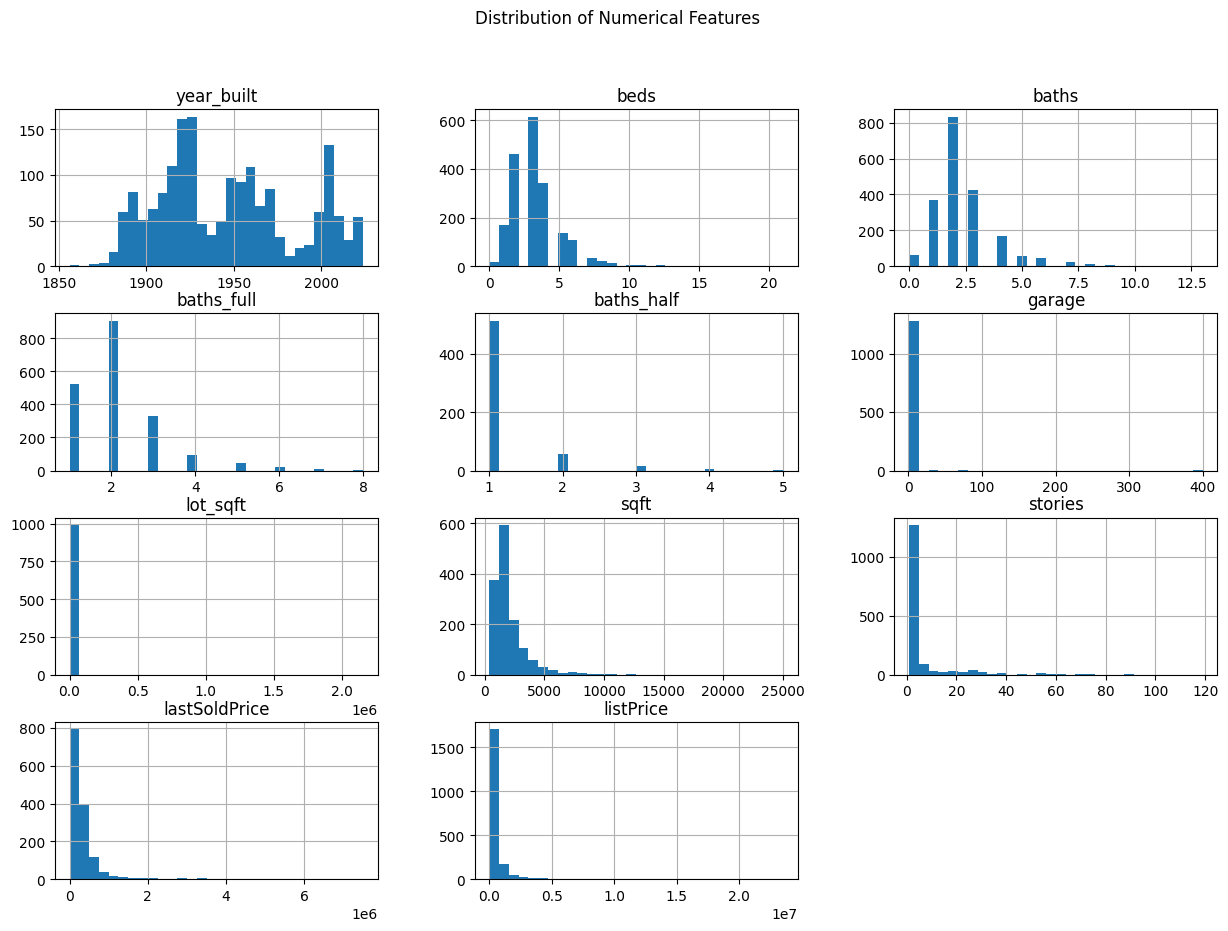

In [6]:
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features", size=12)
plt.show()

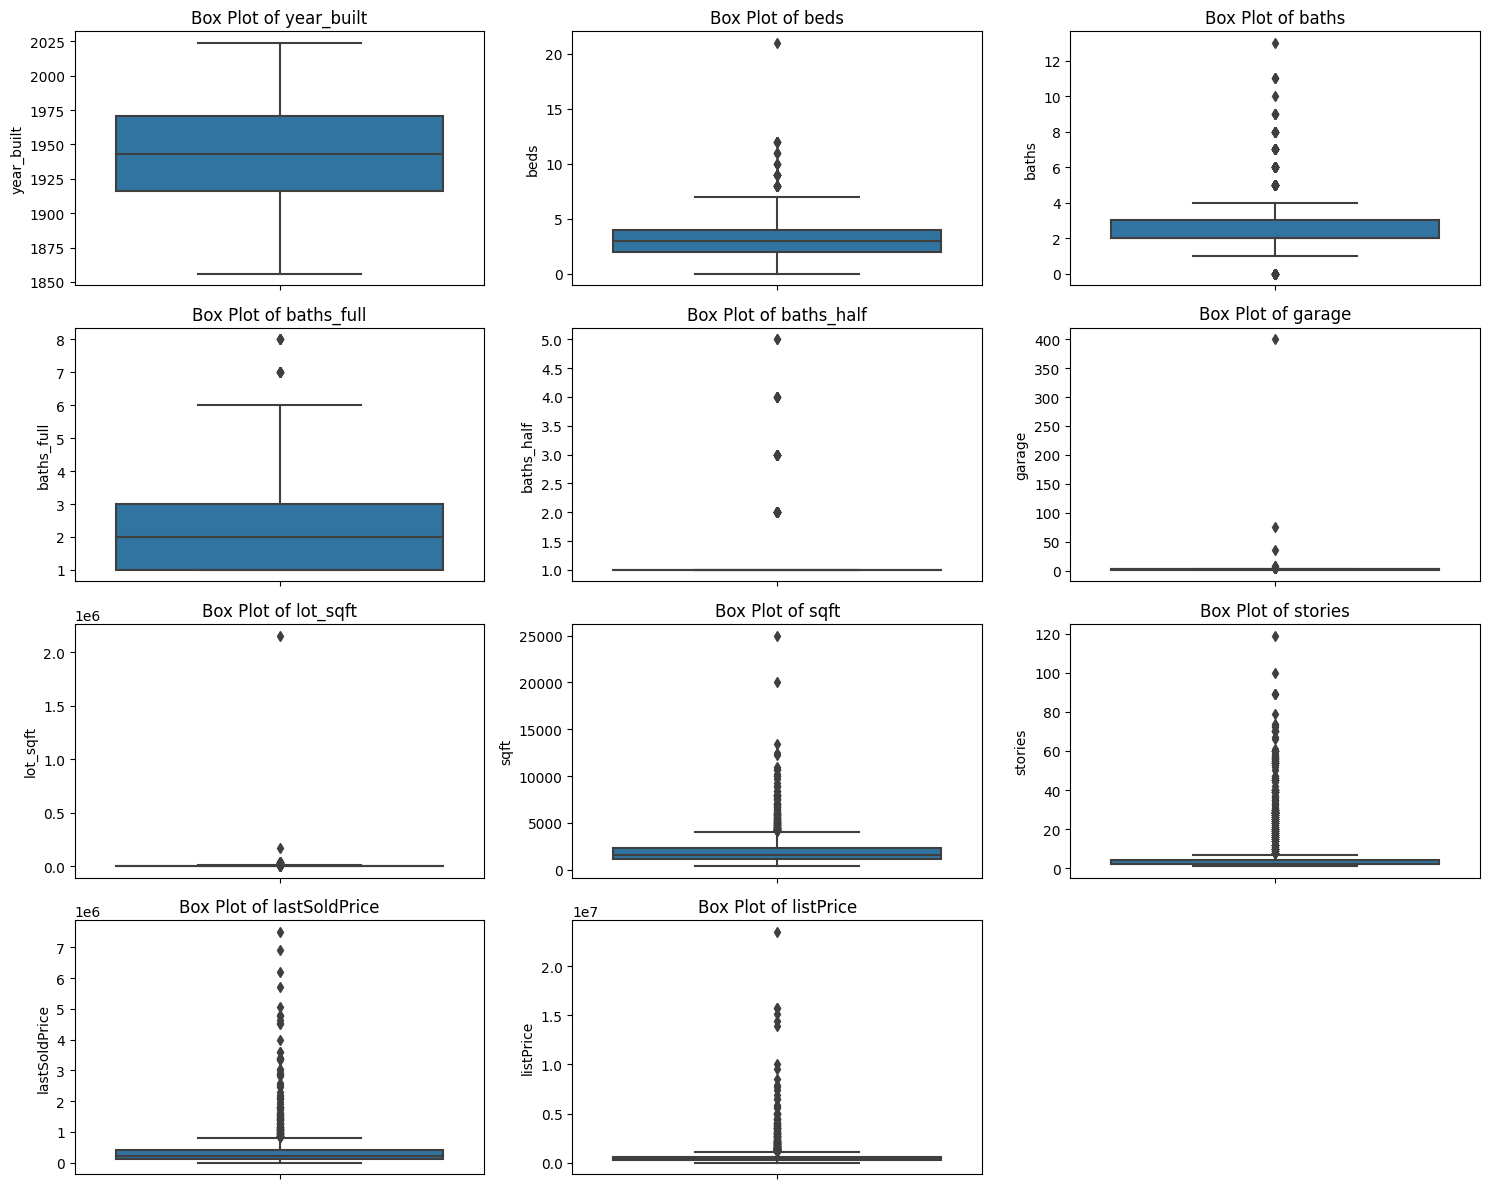

In [7]:
n_cols=3
n_rows= math.ceil(len(numerical_cols) / n_cols)
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i+1) 
    sns.boxplot(y=df[feature])
    plt.title(f"Box Plot of {feature}")
    plt.tight_layout() 
plt.show()

### Distribution of Categorical Variables
text and soldOn are not true Categorical Variables

In [8]:
categorical_cols = df.select_dtypes(include="object").columns
df[categorical_cols].nunique().to_frame().rename(columns={0:"Number of Unique Categories"})

,Number of Unique Categories
type,7
text,1981
soldOn,1253
status,2


### Missing Data Analysis
There are two columns with more to 50% of the data missing. These should be removed. 

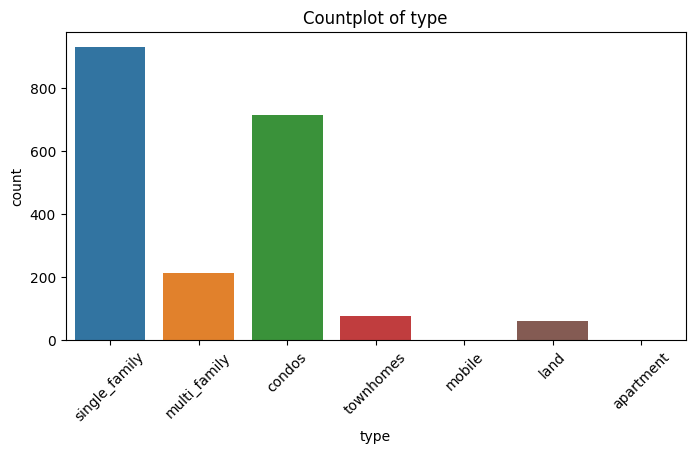

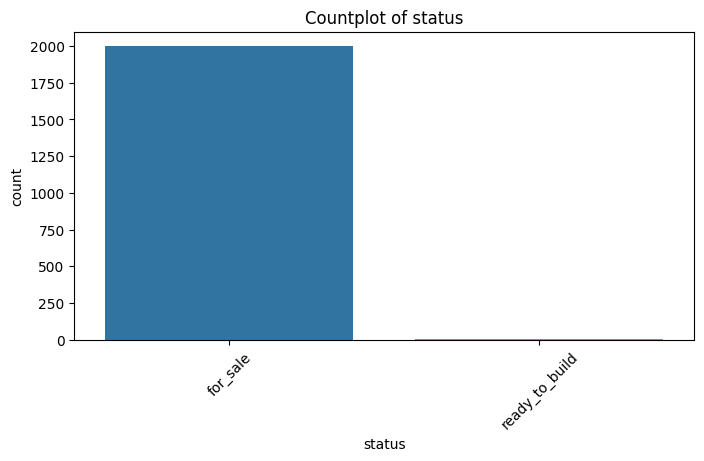

In [9]:
columns_to_plot = ['type', 'status']
for col in columns_to_plot:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [10]:
missing_df= df.isnull().sum().to_frame().rename(columns={0:"Num missing values"})
missing_df["Percentage of missing values(%)"]=round((missing_df["Num missing values"]/len( df))*100,2)
missing_df

,Num missing values,Percentage of missing values(%)
type,0,0.00
text,8,0.40
year_built,210,10.50
beds,60,3.00
baths,1,0.05
baths_full,63,3.15
baths_half,1408,70.40
garage,718,35.90
lot_sqft,1008,50.40
sqft,553,27.65


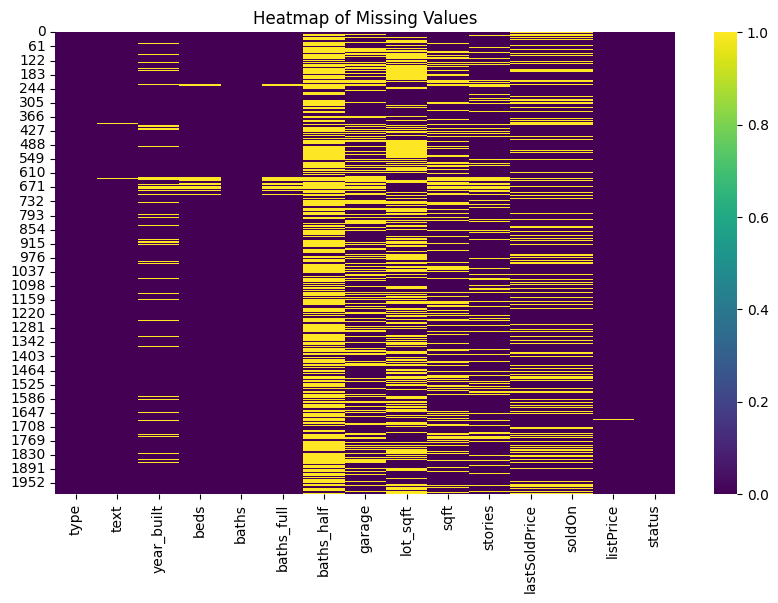

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title("Heatmap of Missing Values");

### Feature-Target Correlation Analysis
As seen in the Correlation Heatmap, listPrice is highly correlated(>0.7) to lastSoldPrice and sqft 

Text(0.5, 1.0, 'Correlation Heatmap')

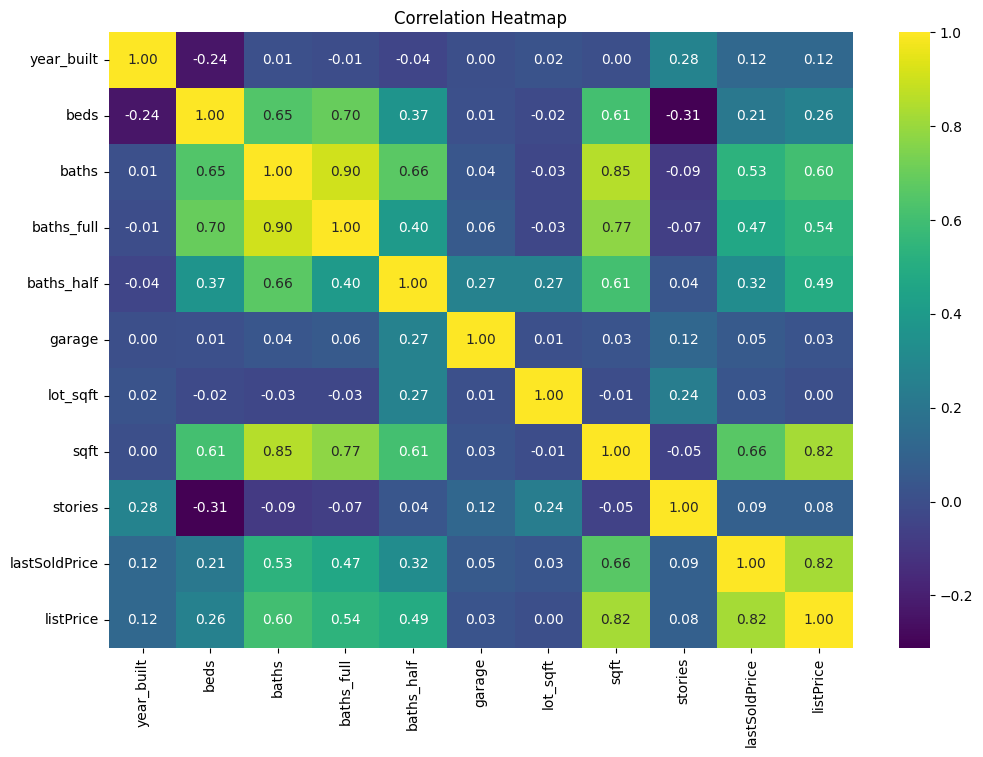

In [12]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


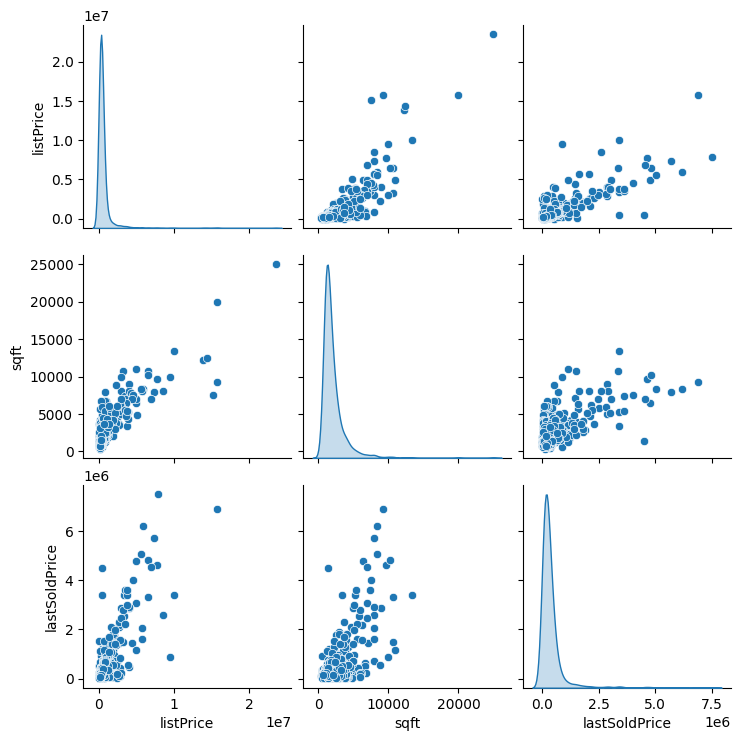

In [13]:
highCorrFeatures = ['listPrice', 'sqft','lastSoldPrice']
sns.pairplot(df[highCorrFeatures], diag_kind='kde')

# Data Preprocessing
For this project I have decided I want to experiment with KNN to impute missing Data. Steps include:
1. Dealing categorical variables.
2. Normalizing numerical features.
3. Handling missing values.
4. Splitting the data into training and test sets.

### Dealing with Categorical variables
1. Dropping text 
2. Converting status and type to numerical columns
3. Converting soldOn to dateTimeObject and extracting Year,day,month,day informationcolumns_to_plot

In [14]:
categorical_cols

Index(['type', 'text', 'soldOn', 'status'], dtype='object')

In [15]:
df=df.drop('text',axis=1)
df['status'].value_counts()

status
for_sale          1999
ready_to_build       1
Name: count, dtype: int64

In [16]:
map_dict={'ready_to_build' : 0,
         'for_sale' : 1}
df['status'] = df['status'].map(map_dict)
df['status'].value_counts()

status
1    1999
0       1
Name: count, dtype: int64

In [17]:
le= LabelEncoder()
df['type']= le.fit_transform(df['type'])
df['type'].value_counts()

type
5    931
1    716
4    212
6     78
2     60
3      2
0      1
Name: count, dtype: int64

In [18]:
# Converting to datetime objects
df['soldOn'] = pd.to_datetime(df['soldOn'], errors='coerce')

In [19]:
#Checking if there are null values
df['soldOn'].isnull().sum()

585

In [20]:
#Assuming that if there is no soldOn date, the house has not been sold Yet
df['IsSoldYet'] = df['soldOn'].notna().astype(int)
#Assuming that these houses have not been sold 
df['soldOn'].fillna(pd.Timestamp('1970-01-01'))

0      1970-01-01
1      1991-04-16
2      2019-10-28
3      1996-05-30
4      1970-01-01
          ...    
1995   2000-09-15
1996   1970-01-01
1997   2016-06-03
1998   1970-01-01
1999   1980-05-13
Name: soldOn, Length: 2000, dtype: datetime64[ns]

In [21]:
# Extracting year, month, day and weekday
df['soldOn_year'] = df['soldOn'].dt.year
df['soldOn_month'] = df['soldOn'].dt.month
df['soldOn_day'] = df['soldOn'].dt.day
df['soldOn_weekday'] = df['soldOn'].dt.weekday

In [22]:
# Dropping soldOn after extracting Information
df=df.drop('soldOn',axis=1)

### Normalizing numerical features.
1. RobustScaler
2. Plot boxPlot to see if there are outliers

In [23]:
numerical_cols

Index(['year_built', 'beds', 'baths', 'baths_full', 'baths_half', 'garage',
       'lot_sqft', 'sqft', 'stories', 'lastSoldPrice', 'listPrice'],
      dtype='object')

In [24]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
scaler = RobustScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [25]:
df[numerical_cols].describe()

,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldPrice,listPrice
count,1790.000000,1940.000000,1999.00000,1937.000000,592.000000,1282.000000,992.000000,1447.000000,1620.000000,1415.000000,1994.000000
mean,0.055723,0.144330,0.43972,0.077956,0.189189,0.131825,1.804136,0.438743,2.591975,0.531398,0.718080
std,0.712071,0.879275,1.45649,0.553319,0.553119,11.367288,36.340856,1.427442,6.518411,2.173661,3.435428
min,-1.589041,-1.500000,-2.00000,-0.500000,0.000000,-1.000000,-1.985699,-0.994093,-0.500000,-0.767520,-0.999286
25%,-0.493151,-0.500000,0.00000,-0.500000,0.000000,-1.000000,-0.331038,-0.320675,0.000000,-0.375110,-0.356857
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.506849,0.500000,1.00000,0.500000,0.000000,0.000000,0.668962,0.679325,1.000000,0.624890,0.643143
max,1.479452,9.000000,11.00000,3.000000,4.000000,398.000000,1139.962924,19.789030,58.500000,25.708738,66.143143


### Handling missing values.
1. Dropping columns with more than 50% data missing
2. Imputing Data using Knn


In [26]:
missing_df[missing_df['Percentage of missing values(%)']>=50.0]

,Num missing values,Percentage of missing values(%)
baths_half,1408,70.4
lot_sqft,1008,50.4


In [27]:
df=df.drop(['baths_half','lot_sqft'],axis=1)

In [28]:
# Using Knn
knn= KNNImputer(n_neighbors=3) 
imputed_data=knn.fit_transform(df)
df = pd.DataFrame(imputed_data,columns=df.columns)


In [29]:
#Checking null counts
df.isnull().sum().to_frame().rename(columns={0:"Num missing values"})

,Num missing values
type,0
year_built,0
beds,0
baths,0
baths_full,0
garage,0
sqft,0
stories,0
lastSoldPrice,0
listPrice,0


In [30]:
df.describe()

,type,year_built,beds,baths,baths_full,garage,sqft,stories,lastSoldPrice,listPrice,status,IsSoldYet,soldOn_year,soldOn_month,soldOn_day,soldOn_weekday
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.406500,0.088381,0.123583,0.440833,0.062667,0.044167,0.425671,2.297833,0.484135,0.717799,0.999500,0.707500,2009.376667,6.693500,15.540000,2.123667
std,1.903173,0.711424,0.877473,1.456977,0.552321,9.648966,1.305098,6.047166,2.012071,3.431850,0.022361,0.455024,10.150417,2.945091,8.205178,1.268183
min,0.000000,-1.589041,-1.500000,-2.000000,-0.500000,-1.000000,-0.994093,-0.500000,-0.767520,-0.999286,0.000000,0.000000,1976.000000,1.000000,1.000000,0.000000
25%,1.000000,-0.456621,-0.500000,0.000000,-0.500000,-1.000000,-0.339381,0.000000,-0.360106,-0.356857,1.000000,0.000000,2003.000000,4.666667,9.000000,1.000000
50%,5.000000,0.054795,0.000000,0.000000,0.000000,0.000000,0.054149,0.000000,-0.031774,0.000000,1.000000,1.000000,2011.000000,7.000000,15.333333,2.000000
75%,5.000000,0.566210,0.500000,1.000000,0.500000,0.000000,0.768143,1.000000,0.586349,0.643143,1.000000,1.000000,2018.000000,9.000000,22.000000,3.000000
max,6.000000,1.479452,9.000000,11.000000,3.000000,398.000000,19.789030,58.500000,25.708738,66.143143,1.000000,1.000000,2024.000000,12.000000,31.000000,6.000000


### Splitting the data into training and test sets.

In [31]:
y=df['listPrice']
X=df.drop('listPrice',axis=1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 15)
(400, 15)
(1600,)
(400,)


## Modeling

We train and evaluate three machine learning models:
1. Linear Regression: A simple baseline model.
2. Random Forest Regressor: A robust ensemble model.
3. XGBoost Regressor: A gradient boosting model for performance optimization.

### Model Training
We use pipelines for streamlined training and testing.


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

pipeline_lr = Pipeline([('linear_model', LinearRegression())])
pipeline_rf = Pipeline([('random_forest', RandomForestRegressor(n_estimators=100, random_state=42))])
pipeline_xgb = Pipeline([('xgb', XGBRegressor())])

pipelines = [pipeline_lr, pipeline_rf, pipeline_xgb]
for pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print(f"{pipeline.steps[-1][0]}: R² Score = {score:.2f}")


linear_model: R² Score = 0.72
random_forest: R² Score = 0.79
xgb: R² Score = 0.54


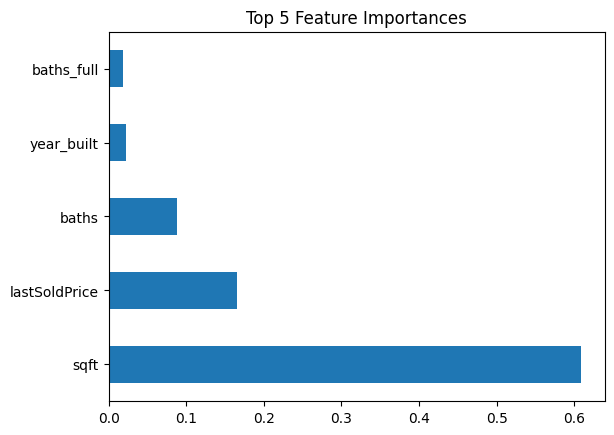

In [34]:
feat_importances = pd.Series(pipeline_rf['random_forest'].feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title('Top 5 Feature Importances');
